In [86]:
#games1,2,3 - trying 4 (baseline is game1)
#071221
#try to add viz (multicolor) and alternate groupong scenarios

# ALTERNATE PROPOSALS FOR THE U.S. VOTER DISTRICTING PROCESS USING HUMAN COLLABORATION, HIGH PERFORMANCE COMPUTING, and METRICS TO EVALUATE REPRESENTATIVENESS

**Goal:**  Propose a generalized districting procedure for any US State / Metro Area.

**Rules:**  
     1) ~ equal. # of voters per district  
     2) absolutely no discrimination (classification) based on race or ethnicity or (other)    

**Options:**  
classifying based on some other parameter may be ok and preferred.    

**Approach:**  
Begin with a randomly generated community of 100 entities, each with its entity "lean".  Simulate the total community lean based on various grouping processes.  Determine if the total (aggregate) community lean (after grouping) reflects the entity ground truth.  
    1) Sim 1:  Determine community "lean" based on sequential order partion of the community, in groups of 10.      
    2) Sim 2:  Determine community "lean" based on an 'every 10' partion of the commmunity, in groups of 10.  
    3) Sim 3:  Determine community "lean" based on a 'randomized' partition of the community, in groups of 10.  
    4) ...  
    5) ...  
    6) ...  
    
**Analysis:**  
In all Sims above, compare community "lean" results against the ground truth statistical proportions of the entities to the  community as a whole.  
Do they agree?  How often?  
Do they disagree?  How often?  Why?  

**Next Steps:**  
Test these Sims against historical voter data to determine better districting options for the present & future.  We suspect the best Sim for a specific location will not always be the same (due to the unique composition of the entities); however, the approach and framework should scale extremely well.



In [87]:
import random as rnd
from typing import Sized
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import io

## Class Definitions (Voter and Community)

In [88]:
#Voter class

class Voter():
    def __init__(self):
        self.lean = "_"
    def __init__(self, lean):
        self.lean = lean
    def set_lean(self, voter_lean):
        self.lean = voter_lean
        
#Community class       
class Community():
    def __init__(self):
        self.voter_list = [] # a community is a collection of voters
        self.voter_districts = [] # a community is also a collection of districts, voters belong in districts
        self.voter_lean_blue = 0
        self.voter_lean_red = 0
        self.voter_lean_grey = 0
    def Add_Voter(self, voter):
        self.voter_list.append(voter)
    def Add_District(self, district):
        self.voter_districts.append(district)
        
    def Set_Voter_List(self, voter_string):
        self.voter_list = [Voter(lean) for lean in voter_string]
        
    def Get_Voter_String(self):
        Voter_String = ""
        for v in self.voter_list:
            Voter_String = Voter_String + v.lean
        return Voter_String
    
    def Get_Community_Lean(self):
        self.voter_lean_blue = 0
        self.voter_lean_red = 0
        self.voter_lean_grey = 0
        for voter in self.voter_list:
            if voter.lean == "+":
                self.voter_lean_blue = self.voter_lean_blue + 1
            elif voter.lean == "-":
                self.voter_lean_red = self.voter_lean_red + 1
            else:
                self.voter_lean_grey = self.voter_lean_grey + 1
        if self.voter_lean_blue >= self.voter_lean_red and self.voter_lean_blue >= self.voter_lean_grey:
            community_lean = "Blue"
        elif self.voter_lean_red >= self.voter_lean_blue and self.voter_lean_red >= self.voter_lean_grey:
            community_lean = "Red"
        elif self.voter_lean_grey >= self.voter_lean_blue and self.voter_lean_grey >= self.voter_lean_red:
            community_lean = "Grey"
        return community_lean

# GAME 1:  1-STEP AT A TIME

## 'Community A' Setup - Game 1

In [89]:
#create a random selection of 100 people
#40% chance "+", 30% chance "-", 30% chance "?"
#0-.4 Blue .4-.7 Red .7-1 Grey
#you are *more likely* to be the same color as your neighbor
Person = 0
Blue_Limit = .52
Red_Limit = .97
Grey_Limit = 1
Total_Blues = 0
Total_Reds = 0
Total_Greys = 0
Total_Lean = ""
community = Community()
while Person < 100:
    number = rnd.random()
    if number < Blue_Limit:
        lean = "+"
        Blue_Limit_New = .7
        Red_Limit_New = .97
        Grey_Limit_New = 1
        Total_Blues = Total_Blues + 1
    elif number < Red_Limit:
        lean = "-"
        Blue_Limit_New = .32
        Red_Limit_New = .97
        Grey_Limit_New = 1
        Total_Reds = Total_Reds + 1
    else:
        lean = "?"
        Blue_Limit_New = .45
        Red_Limit_New = .9
        Grey_Limit_New = 1
        Total_Greys = Total_Greys + 1
    v = Voter(lean)
    community.Add_Voter(v)
    Blue_Limit = Blue_Limit_New
    Red_Limit = Red_Limit_New
    Grey_Limit = Grey_Limit_New
    Total_Lean = Total_Lean + lean
    Person = Person + 1
print ()
print (community.Get_Voter_String())
print (community.Get_Community_Lean(), community.voter_lean_blue, community.voter_lean_red, community.voter_lean_grey)
print ()


++---++--+-+----------+++-+++++++--+-+++++?+++++++++--+++++--++++++++++-----++++++--------++---+?+--
Blue 56 42 2



## Play (Districting) - Game 1:  

In [90]:
#gamescenario #1 - 
#A) #random leans w/ parameters as per 'community setup A'; 
#B) #sequential districting 0-9, 10-19, etc.

#let's split up our community in smaller communities (i.e. districts)
for i in range(0, 10):
    #define a district
    D = Community()
    #assign the proper voters to the proper district (voters 0 through 9 to District 1, voters 10 through 19 to District 2, etc...)
    D.voter_list = community.voter_list[i*10 : i*10 + 10]
    community.Add_District(D)
  #  print()
  #  print (D.Get_Voter_String())
  #  print (D.Get_Community_Lean())
districts_leaning_blue = 0
districts_leaning_red = 0
districts_leaning_grey = 0
for d in community.voter_districts:
    if d.Get_Community_Lean() == "Blue":
        districts_leaning_blue = districts_leaning_blue + 1
    elif d.Get_Community_Lean() == "Red":
        districts_leaning_red = districts_leaning_red + 1
    elif d.Get_Community_Lean() == "Grey":
        districts_leaning_grey = districts_leaning_grey + 1
districts_lean = ""
if districts_leaning_blue >= districts_leaning_red and districts_leaning_blue >= districts_leaning_grey:
    districts_lean = "Blue"
elif districts_leaning_red >= districts_leaning_blue and districts_leaning_red >= districts_leaning_grey:
    districts_lean = "Red"
elif districts_leaning_grey >= districts_leaning_blue and districts_leaning_grey >= districts_leaning_red:
    districts_lean = "Grey"
#print()
print (community.Get_Community_Lean(), community.voter_lean_blue, community.voter_lean_red, community.voter_lean_grey)
print (districts_lean, districts_leaning_blue, districts_leaning_red, districts_leaning_grey)

Blue 56 42 2
Blue 7 3 0


## Visualization Game 1

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


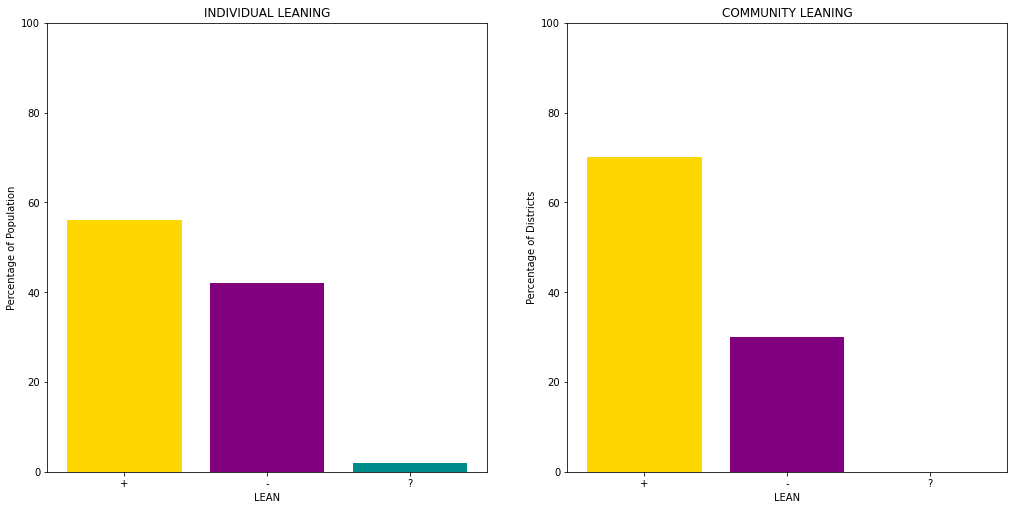

In [105]:
ent = pd.DataFrame({'ent':[community.voter_lean_blue, community.voter_lean_red, community.voter_lean_grey]})
sel = pd.DataFrame({'sel':[districts_leaning_blue*10, districts_leaning_red*10, districts_leaning_grey*10]})

#ent
#sel

plt.subplots(figsize=(15, 8))

plt.subplot(1, 2, 1)
plt.bar(['+','-','?'], ent['ent'], color = ['gold', 'purple', 'darkcyan'])
plt.xlabel('LEAN')
plt.ylabel('Percentage of Population')
plt.ylim(0,100)
plt.title('INDIVIDUAL LEANING')

plt.subplot(1, 2, 2)
plt.bar(['+','-','?'], sel['sel'], color = ['gold', 'purple', 'darkcyan'])
plt.xlabel('LEAN')
plt.ylabel('Percentage of Districts')
plt.ylim(0,100)
plt.title('COMMUNITY LEANING')

plt.tight_layout(4)
plt.show()